# splitting data in x and y and resizing. (SEQUENTIAL)

In [1]:
import os
import cv2

data_dir =  "./sih_road_dataset"
labels = ["good", "poor", "satisfactory", "very_poor"]
x = []
y = []
for label in labels:
    data = os.path.join(data_dir,label)
    for image in os.listdir(data):
        try:
            im = cv2.imread(os.path.join(data,image),cv2.IMREAD_COLOR)
            im = cv2.resize(im,(224,224))
            # Using the Canny filter with different parameters
            
            x.append(im)
            y.append(labels.index(label))
            
            
        except Exception as e:
            pass

print(len(x))

KeyboardInterrupt: 

# splitting data in x and y and resizing. (PARALLEL USING JOBLIB)

In [122]:
import os
import cv2
from joblib import Parallel, delayed

data_dir = "./sih_road_dataset"
labels = ["good", "poor", "satisfactory", "very_poor"]
x = []
y = []

def process_image(image):
    try:
        im = cv2.imread(image, cv2.IMREAD_COLOR)
        im = cv2.resize(im, (224, 224))
        return im
    except Exception as e:
        pass

def process_label(label):
    data = os.path.join(data_dir, label)
    images = [os.path.join(data, image) for image in os.listdir(data)]
    
    results = Parallel(n_jobs=-1)(delayed(process_image)(image) for image in images)
    
    for result in results:
        if result is not None:
            x.append(result)
            y.append(labels.index(label))

for label in labels:
    process_label(label)


print(len(x))


2074


# splitting data in x and y and resizing. (PARALLEL USING SPARK (FIRST ONE))

In [75]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("RoadClassification") \
    .master("local[*]") \
    .config("spark.driver.memory", "8g") \
    .config("spark.executor.memory", "8g") \
    .getOrCreate()

spark

In [123]:
import os
import cv2
from pyspark.sql import SparkSession

data_dir = "./sih_road_dataset"
labels = ["good", "poor", "satisfactory", "very_poor"]
x = []
y = []

def process_image(image):
    try:
        im = cv2.imread(image, cv2.IMREAD_COLOR)
        im = cv2.resize(im, (224, 224))
        return im
    except Exception as e:
        pass

def process_label(label):
    data = os.path.join(data_dir, label)
    images = [os.path.join(data, image) for image in os.listdir(data)]

    results = spark.sparkContext.parallelize(images) \
        .map(process_image) \
        .filter(lambda x: x is not None) \
        .collect()

    for result in results:
        x.append(result)
        y.append(labels.index(label))


for label in labels:
    process_label(label)



In [125]:
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [74]:
spark.stop()

# splitting data in x and y and resizing. (PARALLEL USING SPARK (SECOND ONE))

In [ ]:
# import os
# import cv2
# from pyspark.sql import SparkSession

# data_dir = "./sih_road_dataset"
# labels = ["good", "poor", "satisfactory", "very_poor"]
# x = []
# y = []

# def process_image(file_path):
#     try:
#         im = cv2.imread(file_path, cv2.IMREAD_COLOR)
#         im = cv2.resize(im, (224, 224))
#         # Perform any additional image processing steps here
#         return im
#     except Exception as e:
#         return None



# file_paths_rdd = spark.sparkContext.parallelize([
#     os.path.join(data_dir, label, image)
#     for label in labels
#     for image in os.listdir(os.path.join(data_dir, label))
# ])

# processed_images_rdd = file_paths_rdd.map(process_image)
# filtered_images_rdd = processed_images_rdd.filter(lambda x: x is not None)
# processed_images = filtered_images_rdd.collect()

# for im in processed_images:
#     x.append(im)
#     y.append(labels.index(label))




In [114]:
# Just checking the legth of x and y
len(x)        
len(y)


2074

# Changing list to array and rescaling the Data

In [116]:
import numpy as np
np.unique(y)
np.unique(x)

x = np.array(x)/255.0
y = np.array(y)

x.shape
y.shape

x = x.reshape(-1, 224, 224, 3)
x.shape
y = y.reshape(-1, 1)

# Turning y labels to categorical and Analysing Images

In [79]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y,4,)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagenerator = ImageDataGenerator(
fill_mode= 'nearest',
horizontal_flip=False,
vertical_flip=False,
shear_range=0.1,
zoom_range = 0.1, # Randomly zoom image 
width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
height_shift_range=0.2
)
datagenerator.fit(x)

# Splitting Data into train and test

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [108]:
print(len(x_train))

1555


# Using CNN (Convolutional neural Network)

In [81]:
import tensorflow as tf
model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32,(5,5),padding ='same',strides=(2,2),activation='relu',input_shape=(224,224,3)),
tf.keras.layers.MaxPooling2D((2,2)),
tf.keras.layers.Conv2D(64,(5,5),padding ='same',strides=(2,2),activation='relu'),
tf.keras.layers.MaxPooling2D((2,2)),
tf.keras.layers.Conv2D(128,(5,5),padding ='same',strides=(2,2),activation='relu'),
tf.keras.layers.MaxPooling2D((2,2)),
tf.keras.layers.Conv2D(128,(5,5),padding ='same',strides=(2,2),activation='relu'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(256,activation='relu'),
tf.keras.layers.Dropout(0.3),
    
tf.keras.layers.Dense(4,activation='softmax')
])


model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# from pyspark.sql import SparkSession

# spark = SparkSession.builder.master("spark://192.168.217.1:7077").getOrCreate()


In [ ]:
# def train_fn(model, datagenerator):

#     sess = tf.Session()

#     with sess.as_default():
#         # Set the Keras session as the default session for this worker
#         tf.keras.backend.set_session(sess)
#         model.fit(datagenerator.flow(x_train,y_train,batch_size=32),epochs=20,validation_data=datagenerator.flow(x_test,y_test))



In [ ]:
# from tensorflowonspark import TFCluster
# cluster = TFCluster.run(
#     sc=spark.sparkContext,
#     map_fun = train_fn,
#     tf_args = (model, datagenerator),
#     num_executors= 2,
#     num_ps=1,
# )

# cluster.awaitTermination()

# Using early stopping and training the model (EarlyStopping stop the model from overfitting).

In [82]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=4,restore_best_weights=True)

model.fit(datagenerator.flow(x_train,y_train,batch_size=32),epochs=20,callbacks=[earlystop],validation_data=datagenerator.flow(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 31s 604ms/step - loss: 0.9498 - accuracy: 0.5936 - val_loss: 0.5500 - val_accuracy: 0.8285
Epoch 2/20
49/49 [==============================] - 30s 609ms/step - loss: 0.4976 - accuracy: 0.8026 - val_loss: 0.4048 - val_accuracy: 0.8632
Epoch 3/20
49/49 [==============================] - 32s 653ms/step - loss: 0.3319 - accuracy: 0.8765 - val_loss: 0.3522 - val_accuracy: 0.8536
Epoch 4/20
49/49 [==============================] - 30s 604ms/step - loss: 0.3354 - accuracy: 0.8701 - val_loss: 0.3318 - val_accuracy: 0.8748
Epoch 5/20
49/49 [==============================] - 31s 625ms/step - loss: 0.2905 - accuracy: 0.8965 - val_loss: 0.3672 - val_accuracy: 0.8632
Epoch 6/20
49/49 [==============================] - 30s 616ms/step - loss: 0.3118 - accuracy: 0.8778 - val_loss: 0.2980 - val_accuracy: 0.8690
Epoch 7/20
49/49 [==============================] - 30s 606ms/step - loss: 0.3146 - accuracy: 0.8772 - val_loss: 0.3761 - val_accuracy: 0.8516

# Plotting loss|val_loss to see if model overfitting or not

#### Note: If val_loss is higher then loss it means model is overfitting.

<AxesSubplot:>

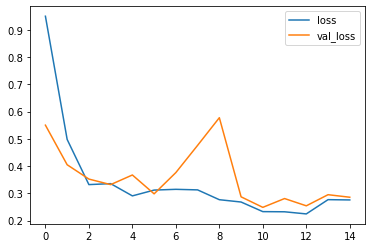

In [83]:
import pandas as pd
history = pd.DataFrame(model.history.history)
history[["loss", "val_loss"]].plot()

# At last evaluating the model to check accuracy

In [84]:
model.evaluate(x_test, y_test)

17/17 [==============================] - 1s 56ms/step - loss: 0.2878 - accuracy: 0.8844


[0.2877589166164398, 0.884393036365509]

In [ ]:
# model.save('saved_model')


In [ ]:
# model = tf.keras.models.load_model('saved_model')

In [55]:
spark

In [132]:
import os
from PIL import Image
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("RoadClassification").getOrCreate()

def convert_to_array(img):
    im = cv2.imread(img)
    img = Image.fromarray(im, 'RGB')
    image = img.resize((224, 224))
    return np.array(image)

def get_profile_name(label):
    if label == 0:
        return "Good"
    if label == 1:
        return "Poor"
    if label == 2:
        return "Satisfactory"
    if label == 3:
        return "Very_Poor"

def predict_profile(file):
    print("Predicting " + file + " .................................")
    ar = convert_to_array(file)
    ar = ar / 255
    a = []
    a.append(ar)
    a = np.array(a)
    score = model.predict(a, verbose=1)
    print(score)
    label_index = np.argmax(score)
    print(label_index)
    acc = np.max(score)
    profile = get_profile_name(label_index)
    return (file, profile, acc)

test_dir = "./testing_data/potholes/"

image_files = [os.path.join(test_dir, file) for file in os.listdir(test_dir)]

image_rdd = spark.sparkContext.parallelize(image_files)

predictions_rdd = image_rdd.map(predict_profile)

predictions = predictions_rdd.collect()

for prediction in predictions:
    file, profile, acc = prediction
    print("File:", file)
    print("Predicted profile:", profile)
    print("Accuracy:", acc)
    print()





File: ./testing_data/potholes/1.jpg
Predicted profile: Very_Poor
Accuracy: 0.976607

File: ./testing_data/potholes/10.jpg
Predicted profile: Poor
Accuracy: 0.8232648

File: ./testing_data/potholes/100.jpg
Predicted profile: Very_Poor
Accuracy: 0.9976059

File: ./testing_data/potholes/101.jpg
Predicted profile: Very_Poor
Accuracy: 0.9958598

File: ./testing_data/potholes/102.jpg
Predicted profile: Very_Poor
Accuracy: 0.8282644

File: ./testing_data/potholes/103.jpg
Predicted profile: Very_Poor
Accuracy: 0.9947226

File: ./testing_data/potholes/104.jpg
Predicted profile: Very_Poor
Accuracy: 0.9930929

File: ./testing_data/potholes/105.jpg
Predicted profile: Very_Poor
Accuracy: 0.5050869

File: ./testing_data/potholes/106.jpg
Predicted profile: Very_Poor
Accuracy: 0.9960627

File: ./testing_data/potholes/107.jpg
Predicted profile: Poor
Accuracy: 0.5105378

File: ./testing_data/potholes/108.jpg
Predicted profile: Very_Poor
Accuracy: 0.8747741

File: ./testing_data/potholes/109.jpg
Predicte

#  Prediction of Road for individual images

In [126]:
from PIL import Image
def convert_to_array(img):
    im = cv2.imread(img)
    img = Image.fromarray(im, 'RGB')
    image = img.resize((224, 224))
    return np.array(image)

In [127]:
def get_profile_name(label):
    if label==0:
        return "Good"
    if label==1:
        return "Poor"
    if label==2:
        return "Satisfactory"
    if label==3:
        return "Very_Poor"

In [128]:
def predict_profile(file):
    print("Predicting .................................")
    ar=convert_to_array(file)
    ar=ar/255
    a=[]
    a.append(ar)
    a=np.array(a)
    score=model.predict(a,verbose=1)
    print(score)
    label_index=np.argmax(score)
    print(label_index)
    acc=np.max(score)
    profile=get_profile_name(label_index)
    print(profile)
    print("The predicted profile is a "+profile+" with accuracy =    "+str(acc))    

In [130]:
pre_image = "./sih_road_dataset/good/good_001.JPG"
predict_profile(pre_image)

Predicting .................................
1/1 [==============================] - 0s 29ms/step
[[0.01892693 0.08791502 0.00975007 0.88340795]]
3
Very_Poor
The predicted profile is a Very_Poor with accuracy =    0.88340795
